# Initial Data Exploration

This notebook provides an interactive exploration of the Telco Customer Churn dataset.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
import os

try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
    parent_dir = os.path.dirname(current_dir)
except NameError:
    parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from src.data_exploration import DataExplorer

# Set up plotting
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [20]:
# Load the data
data_path = "../data/raw/Telco-Customer-data.csv"
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

Dataset shape: (7043, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# Initialize DataExplorer
explorer = DataExplorer(data_path=data_path, output_dir="../reports/")
explorer.load_data()

# Run data quality assessment
quality_report = explorer.data_quality_assessment()
print("Data Quality Assessment completed!")

2025-09-23 20:50:41,946 - INFO - Loading data from ../data/raw/Telco-Customer-data.csv
2025-09-23 20:50:42,009 - INFO - Data loaded successfully. Shape: (7043, 21)
2025-09-23 20:50:42,010 - INFO - Starting data quality assessment...  
2025-09-23 20:50:42,122 - INFO - Data quality assessment completed


Data Quality Assessment completed!


2025-09-23 20:50:58,740 - INFO - Analyzing target variable: Churn
2025-09-23 20:50:58,746 - INFO - Target variable analysis completed


Target Variable Analysis:
Churn Distribution: {'value_counts': {'No': 5174, 'Yes': 1869}, 'percentages': {'No': 73.4630129206304, 'Yes': 26.536987079369588}, 'total_samples': 7043}


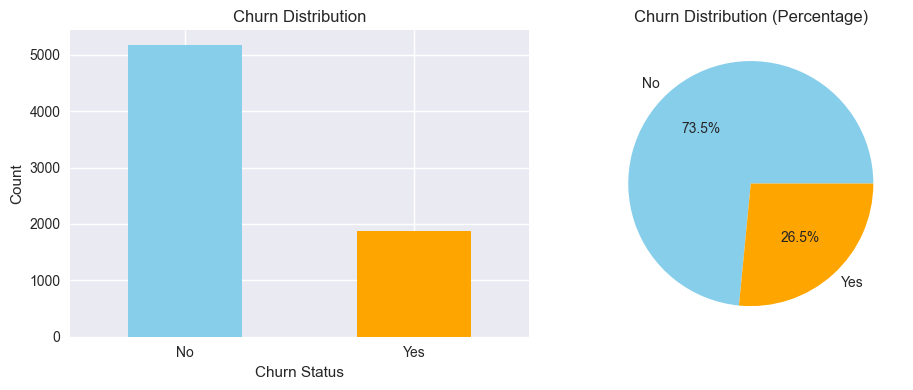

In [22]:
# Analyze target variable
target_analysis = explorer.target_variable_analysis('Churn')
print("Target Variable Analysis:")
print(f"Churn Distribution: {target_analysis['distribution']}")

# Visualize churn distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['Churn'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', 
                                             colors=['skyblue', 'orange'])
plt.title('Churn Distribution (Percentage)')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [23]:
# Generate business insights
business_insights = explorer.business_insights_generation('Churn')
print("Business Insights generated!")

# Display key insights
if 'churn_by_segment' in business_insights:
    for segment, rates in business_insights['churn_by_segment'].items():
        print(f"\nChurn rates by {segment}:")
        for category, rate in rates.items():
            print(f"  {category}: {rate:.1f}%")

2025-09-23 20:57:28,859 - INFO - Generating business insights ...
2025-09-23 20:57:28,942 - INFO - Business insights generation completed


Business Insights generated!

Churn rates by gender:
  Female: 26.9%
  Male: 26.2%

Churn rates by Partner:
  No: 33.0%
  Yes: 19.7%

Churn rates by Dependents:
  No: 31.3%
  Yes: 15.5%

Churn rates by PhoneService:
  No: 24.9%
  Yes: 26.7%
